SimpleQA Dataset Analysis Setup Complete!

Loading SimpleQA dataset from HuggingFace


README.md:   0%|          | 0.00/506 [00:00<?, ?B/s]

simple_qa_test_set.csv: 0.00B [00:00, ?B/s]

Generating test split:   0%|          | 0/4326 [00:00<?, ? examples/s]

Using 'test' split as no 'train' split found
Dataset loaded successfully! Shape: (4326, 3)

 BASIC DATA EXPLORATION 
Dataset Info:
Rows: 4,326
Columns: 3
Memory usage: 2.62 MB

Column Information:
metadata    object
problem     object
answer      object
dtype: object

Sample Data (first 3 rows):
                                            metadata  \
0  {'topic': 'Science and technology', 'answer_ty...   
1  {'topic': 'Science and technology', 'answer_ty...   
2  {'topic': 'Geography', 'answer_type': 'Place',...   

                                             problem             answer  
0  Who received the IEEE Frank Rosenblatt Award i...      Michio Sugeno  
1  Who was awarded the Oceanography Society's Jer...     Annick Bricaud  
2  What's the name of the women's liberal arts co...  Radcliffe College  

 DATA QUALITY ANALYSIS 
Missing Values:
Empty DataFrame
Columns: [Missing Count, Missing Percentage]
Index: []
No missing values found.

Duplicate rows: 0 (0.00%)

Data Types Summar

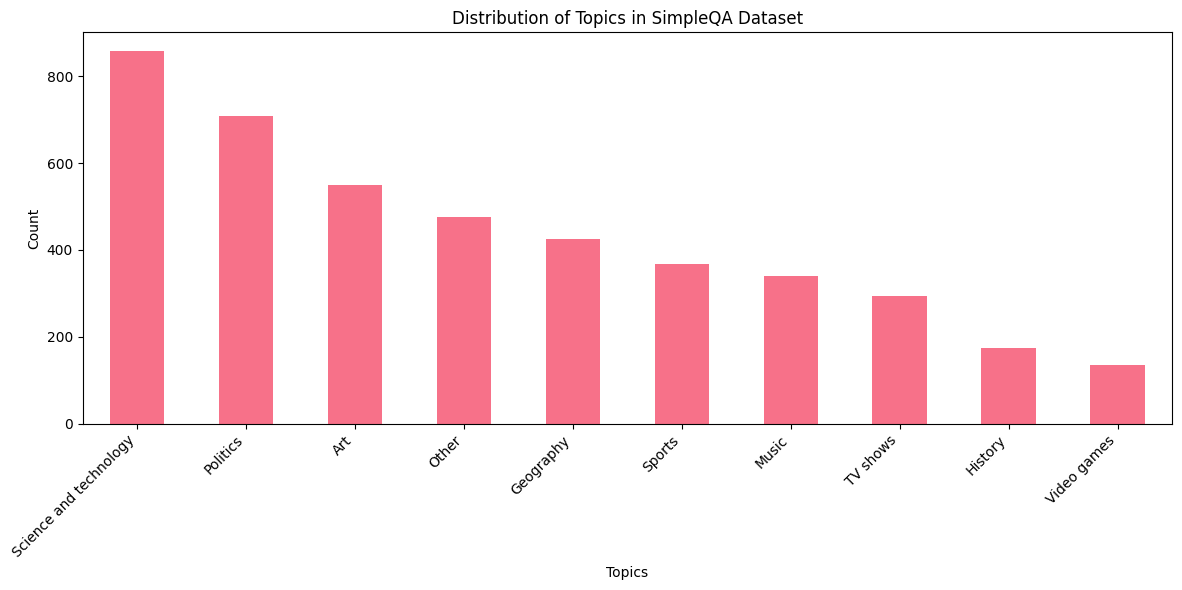


Answer types distribution:
answer_type
Date      1418
Person    1041
Other      777
Number     663
Place      427
Name: count, dtype: int64


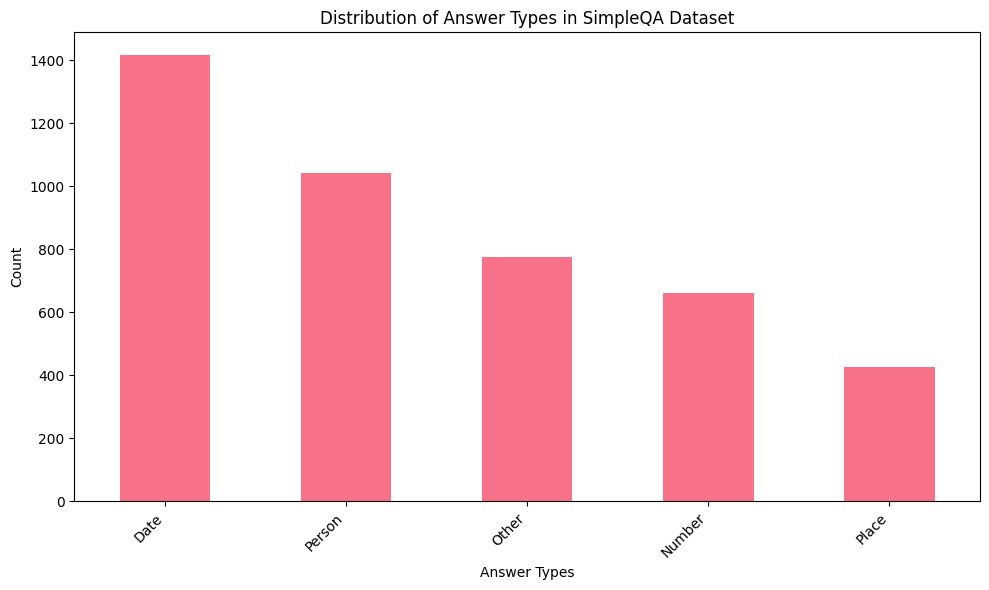


 TEXT ANALYSIS 
Question Analysis:
  Avg length: 96.5 characters
  Avg words: 16.3 words

Answer Analysis:
  Avg length: 13.0 characters
  Avg words: 2.2 words


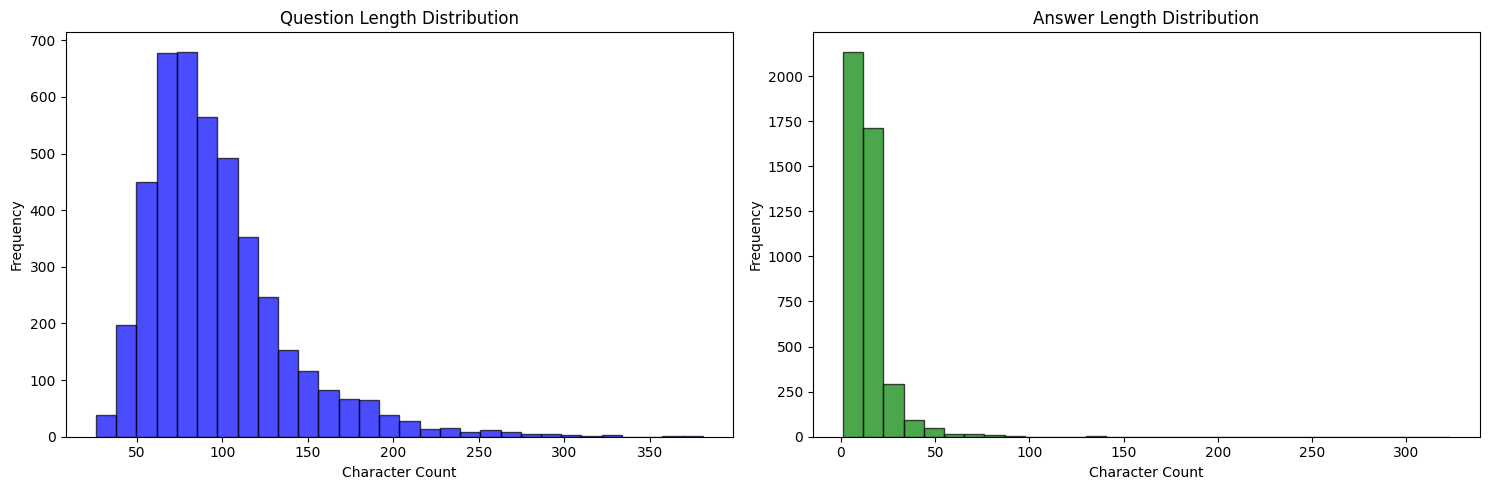


Top 10 question starters:
0
what is      526
what was     355
in which     337
in what      330
on what      212
how many     208
who was      201
what year    182
what day     124
what were     86
Name: count, dtype: int64

 COMPREHENSIVE VISUALIZATION 


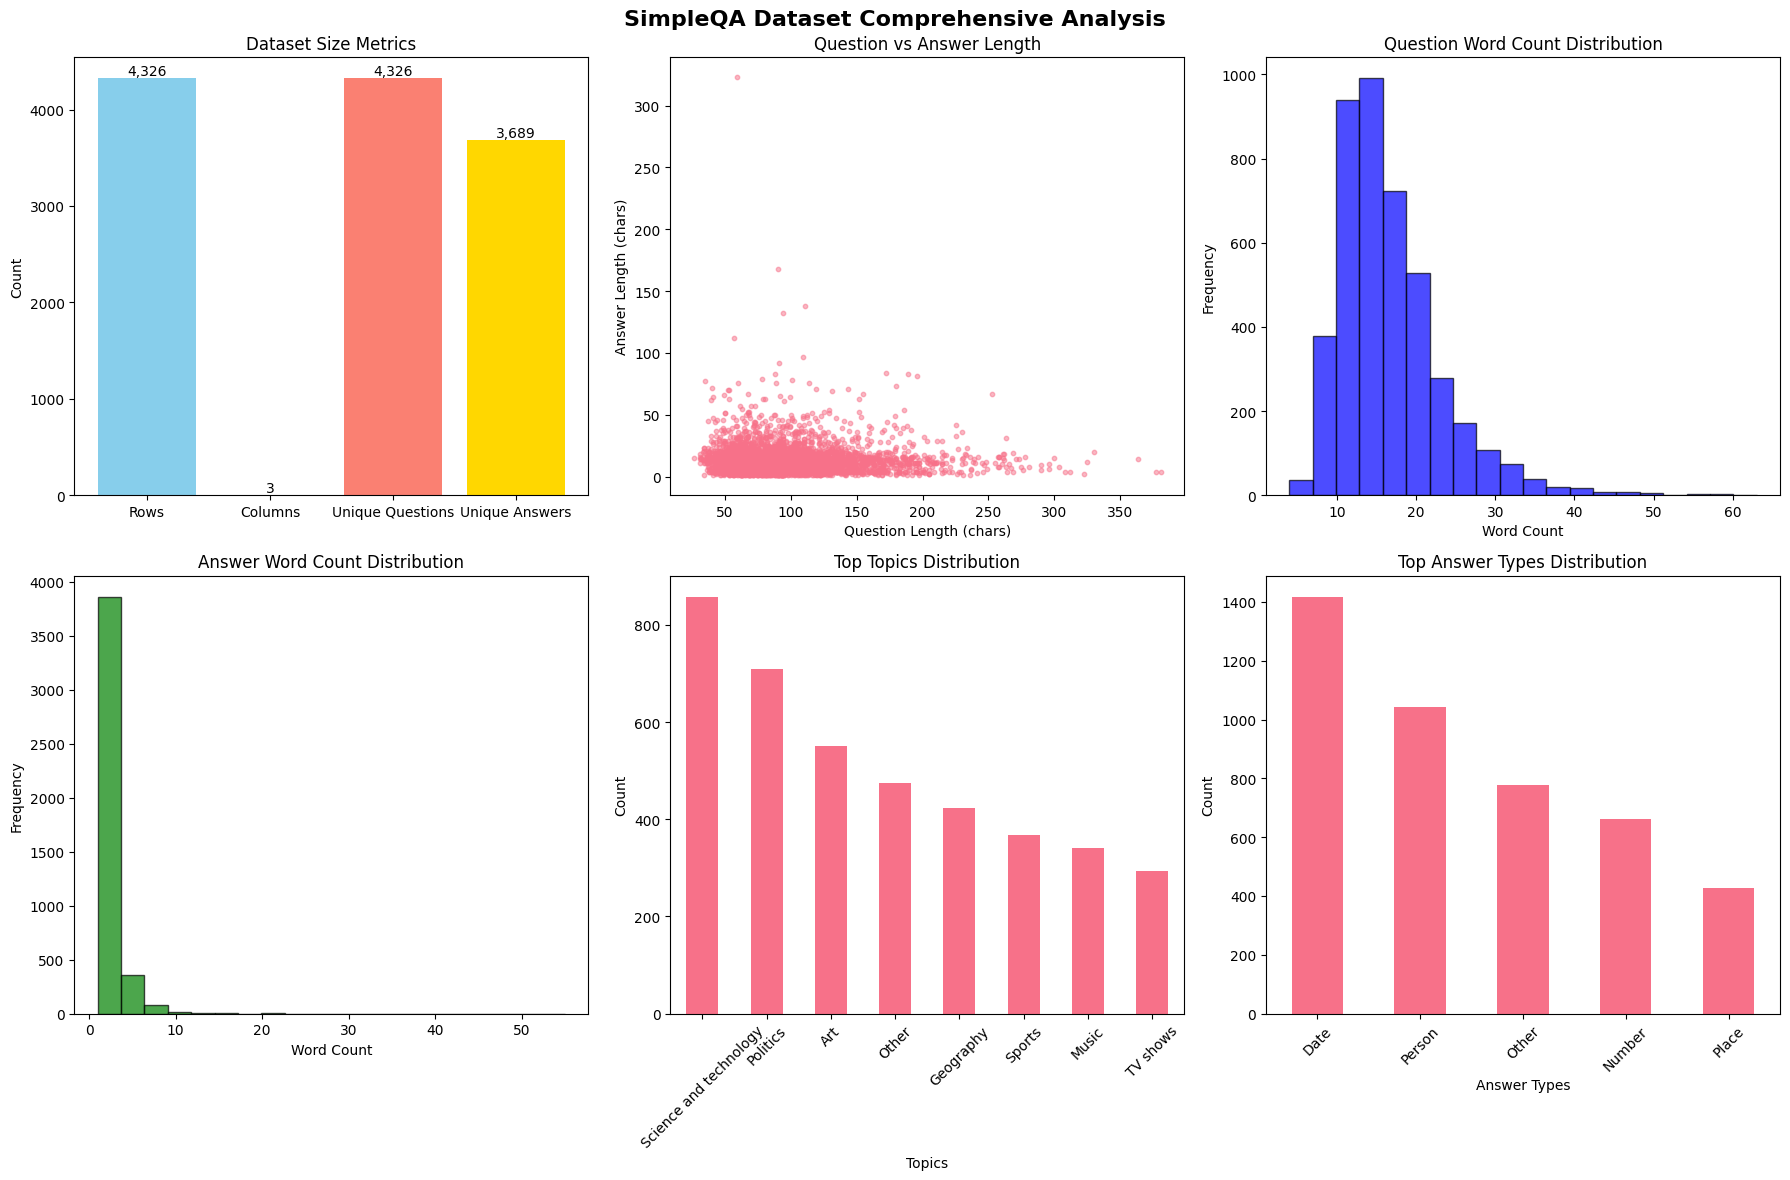

1. Answer Length Classification (Median: 12.0 chars):
   - Short answers: 2377
   - Long answers: 1949

2. Question Complexity Classification (Median: 88.0 chars):
   - Simple questions: 2214
   - Complex questions: 2112

3. Topic Classification ('Science and technology' vs Others):
   - Science and technology: 858
   - Other topics: 3468

 Sample Preprocessing & Model Training 
Model Performance for 'is_long_answer' prediction:
Accuracy: 0.732

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.71      0.75       476
           1       0.68      0.76      0.72       390

    accuracy                           0.73       866
   macro avg       0.73      0.73      0.73       866
weighted avg       0.74      0.73      0.73       866


 ANALYSIS SUMMARY 
Dataset Overview:
  • Total samples: 4,326
  • Text columns: 3
  • Numerical columns: 0
  • Binary columns created: 2
  • Missing values found: False
  • Duplicate rows: 0


In [1]:
# SimpleQA Dataset Analysis for Logistic Regression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset
import warnings
import json
import ast
import scipy.sparse
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

warnings.filterwarnings('ignore')
plt.style.use('default')
sns.set_palette("husl")

print("SimpleQA Dataset Analysis Setup Complete!")
print("\nLoading SimpleQA dataset from HuggingFace")
try:
    dataset = load_dataset("basicv8vc/SimpleQA")
    if 'train' in dataset:
        df = dataset['train'].to_pandas()
    else:
        split_name = list(dataset.keys())[0]
        df = dataset[split_name].to_pandas()
        print(f"Using '{split_name}' split as no 'train' split found")
    
    print(f"Dataset loaded successfully! Shape: {df.shape}")

except Exception as e:
    print(f"Error loading dataset: {e}")
    print("Attempting alternative loading method...")
    try:
        dataset = load_dataset("basicv8vc/SimpleQA", split="train")
        df = dataset.to_pandas()
        print(f"Dataset loaded with alternative method! Shape: {df.shape}")
    except Exception as e2:
        print(f"Alternative method also failed: {e2}")
        print("Please check the dataset name and availability.")

print("\n BASIC DATA EXPLORATION ")
print("Dataset Info:")
print(f"Rows: {df.shape[0]:,}")
print(f"Columns: {df.shape[1]}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\nColumn Information:")
print(df.dtypes)

print("\nSample Data (first 3 rows):")
print(df.head(3))

numerical_cols = df.select_dtypes(include=[np.number]).columns
if len(numerical_cols) > 0:
    print(f"\nNumerical Columns Statistics:")
    print(df[numerical_cols].describe())

print("\n DATA QUALITY ANALYSIS ")
print("Missing Values:")
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percent
}).sort_values('Missing Count', ascending=False)
print(missing_df[missing_df['Missing Count'] > 0])

if missing_df['Missing Count'].sum() == 0:
    print("No missing values found.")

duplicates = df.duplicated().sum()
print(f"\nDuplicate rows: {duplicates:,} ({duplicates/len(df)*100:.2f}%)")

print(f"\nData Types Summary:")
for dtype in df.dtypes.value_counts().items():
    print(f"  {dtype[0]}: {dtype[1]} columns")

print("\n METADATA PARSING AND ANALYSIS ")

def parse_metadata(metadata_str):
    """Parse metadata string to dictionary, trying JSON and ast.literal_eval."""
    try:
        return json.loads(metadata_str.replace("'", '"'))
    except:
        try:
            return ast.literal_eval(metadata_str)
        except:
            return {}

print("Parsing metadata...")
metadata_list = [parse_metadata(meta_str) for meta_str in df['metadata']]
meta_df = pd.DataFrame(metadata_list)
print(f"Parsed {len(meta_df)} metadata entries.")
print(f"\nMetadata columns: {list(meta_df.columns)}")

if 'topic' in meta_df.columns:
    print(f"\nTopics distribution:")
    topic_counts = meta_df['topic'].value_counts()
    print(topic_counts)
    
    plt.figure(figsize=(12, 6))
    topic_counts.plot(kind='bar')
    plt.title('Distribution of Topics in SimpleQA Dataset')
    plt.xlabel('Topics')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

if 'answer_type' in meta_df.columns:
    print(f"\nAnswer types distribution:")
    answer_type_counts = meta_df['answer_type'].value_counts()
    print(answer_type_counts)
    
    plt.figure(figsize=(10, 6))
    answer_type_counts.plot(kind='bar')
    plt.title('Distribution of Answer Types in SimpleQA Dataset')
    plt.xlabel('Answer Types')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

print("\n TEXT ANALYSIS ")
question_lengths = df['problem'].str.len()
question_words = df['problem'].str.split().str.len()
answer_lengths = df['answer'].str.len()
answer_words = df['answer'].str.split().str.len()

print("Question Analysis:")
print(f"  Avg length: {question_lengths.mean():.1f} characters")
print(f"  Avg words: {question_words.mean():.1f} words")

print("\nAnswer Analysis:")
print(f"  Avg length: {answer_lengths.mean():.1f} characters")
print(f"  Avg words: {answer_words.mean():.1f} words")

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].hist(question_lengths, bins=30, alpha=0.7, color='blue', edgecolor='black')
axes[0].set_title('Question Length Distribution')
axes[0].set_xlabel('Character Count')
axes[0].set_ylabel('Frequency')
axes[1].hist(answer_lengths, bins=30, alpha=0.7, color='green', edgecolor='black')
axes[1].set_title('Answer Length Distribution')
axes[1].set_xlabel('Character Count')
axes[1].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

print("\nTop 10 question starters:")
question_starters = df['problem'].str.lower().str.extract(r'^(\w+\s+\w+)')[0].value_counts().head(10)
print(question_starters)

print("\n COMPREHENSIVE VISUALIZATION ")
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('SimpleQA Dataset Comprehensive Analysis', fontsize=16, fontweight='bold')

# Plot 1: Dataset size metrics
ax1 = axes[0, 0]
size_data = ['Rows', 'Columns', 'Unique Questions', 'Unique Answers']
size_values = [df.shape[0], df.shape[1], df['problem'].nunique(), df['answer'].nunique()]
bars = ax1.bar(size_data, size_values, color=['skyblue', 'lightgreen', 'salmon', 'gold'])
ax1.set_title('Dataset Size Metrics')
ax1.set_ylabel('Count')
for bar, value in zip(bars, size_values):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height, f'{value:,}', ha='center', va='bottom')

# Plot 2: Question vs Answer length scatter
ax2 = axes[0, 1]
ax2.scatter(question_lengths, answer_lengths, alpha=0.5, s=10)
ax2.set_xlabel('Question Length (chars)')
ax2.set_ylabel('Answer Length (chars)')
ax2.set_title('Question vs Answer Length')

# Plot 3: Question word count distribution
ax3 = axes[0, 2]
ax3.hist(question_words, bins=20, alpha=0.7, color='blue', edgecolor='black')
ax3.set_title('Question Word Count Distribution')
ax3.set_xlabel('Word Count')
ax3.set_ylabel('Frequency')

# Plot 4: Answer word count distribution
ax4 = axes[1, 0]
ax4.hist(answer_words, bins=20, alpha=0.7, color='green', edgecolor='black')
ax4.set_title('Answer Word Count Distribution')
ax4.set_xlabel('Word Count')
ax4.set_ylabel('Frequency')

# Plot 5: Topic distribution
ax5 = axes[1, 1]
if 'topic' in meta_df.columns:
    meta_df['topic'].value_counts().head(8).plot(kind='bar', ax=ax5)
    ax5.set_title('Top Topics Distribution')
    ax5.set_xlabel('Topics')
    ax5.set_ylabel('Count')
    ax5.tick_params(axis='x', rotation=45)
else:
    ax5.text(0.5, 0.5, 'Topic info not available', ha='center', va='center', transform=ax5.transAxes)
    ax5.set_title('Topics')

# Plot 6: Answer type distribution
ax6 = axes[1, 2]
if 'answer_type' in meta_df.columns:
    meta_df['answer_type'].value_counts().head(8).plot(kind='bar', ax=ax6)
    ax6.set_title('Top Answer Types Distribution')
    ax6.set_xlabel('Answer Types')
    ax6.set_ylabel('Count')
    ax6.tick_params(axis='x', rotation=45)
else:
    ax6.text(0.5, 0.5, 'Answer type info not available', ha='center', va='center', transform=ax6.transAxes)
    ax6.set_title('Answer Types')

plt.tight_layout()
plt.show()

answer_length_median = df['answer'].str.len().median()
df['is_long_answer'] = (df['answer'].str.len() > answer_length_median).astype(int)
print(f"1. Answer Length Classification (Median: {answer_length_median} chars):")
print(f"   - Short answers: {sum(df['is_long_answer']==0)}")
print(f"   - Long answers: {sum(df['is_long_answer']==1)}")

question_length_median = df['problem'].str.len().median()
df['is_complex_question'] = (df['problem'].str.len() > question_length_median).astype(int)
print(f"\n2. Question Complexity Classification (Median: {question_length_median} chars):")
print(f"   - Simple questions: {sum(df['is_complex_question']==0)}")
print(f"   - Complex questions: {sum(df['is_complex_question']==1)}")

# Merge metadata for further tasks
df_merged = df.reset_index().merge(meta_df.assign(row_id=meta_df.index), left_on='index', right_on='row_id', how='left')

if 'topic' in df_merged.columns and not df_merged['topic'].isnull().all():
    most_common_topic = df_merged['topic'].value_counts().index[0]
    df_merged['is_main_topic'] = (df_merged['topic'] == most_common_topic).astype(int)
    print(f"\n3. Topic Classification ('{most_common_topic}' vs Others):")
    print(f"   - {most_common_topic}: {sum(df_merged['is_main_topic']==1)}")
    print(f"   - Other topics: {sum(df_merged['is_main_topic']==0)}")

print("\n Sample Preprocessing & Model Training ")
# Example using the 'is_long_answer' task
target_col = 'is_long_answer'
y = df[target_col]

# 1. Text features from questions
tfidf_vectorizer = TfidfVectorizer(
    max_features=1000,
    stop_words='english',
    ngram_range=(1, 2),
    min_df=2
)
question_features = tfidf_vectorizer.fit_transform(df['problem'])

# 2. Additional numerical features
numerical_features = pd.DataFrame({
    'question_length': df['problem'].str.len(),
    'question_words': df['problem'].str.split().str.len(),
    'has_question_mark': df['problem'].str.contains(r'\?').astype(int),
    'starts_with_what': df['problem'].str.lower().str.startswith('what').astype(int),
    'starts_with_who': df['problem'].str.lower().str.startswith('who').astype(int),
    'starts_with_where': df['problem'].str.lower().str.startswith('where').astype(int),
})

scaler = StandardScaler()
numerical_features_scaled = scaler.fit_transform(numerical_features)

# 3. Combine features
X_combined = scipy.sparse.hstack([question_features, numerical_features_scaled])

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_combined, y, test_size=0.2, random_state=42, stratify=y
)

# 5. Train logistic regression model
lr_model = LogisticRegression(
    random_state=42,
    max_iter=1000,
    class_weight='balanced'
)
lr_model.fit(X_train, y_train)

# 6. Evaluate the model
y_pred = lr_model.predict(X_test)
print(f"Model Performance for '{target_col}' prediction:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


print("\n ANALYSIS SUMMARY ")
text_cols = df.select_dtypes(include=['object']).columns
binary_cols = [col for col in df.columns if df[col].nunique() == 2]

print(f"Dataset Overview:")
print(f"  • Total samples: {df.shape[0]:,}")
print(f"  • Text columns: {len(text_cols)}")
print(f"  • Numerical columns: {len(numerical_cols)}")
print(f"  • Binary columns created: {len(binary_cols)}")
print(f"  • Missing values found: {missing_df['Missing Count'].sum() > 0}")
print(f"  • Duplicate rows: {duplicates:,}")
